A random forest is a composistion of decision trees. A decision tree is what it sounds like. Each node can be split into further nodes based on some criteria. Ideally each leaf node would give certainty about the catagory of the dependent variable.

We will start by creating an algorithm for training decision trees. First we will generate some test data. Let there be three different categories: A, B and C. These are distributed based on the continuous variables x and y. Let them be bivariate normally distributed as such:

A ~ N(u_A,o_A)

B ~ N(u_B,o_B)

C ~ N(u_C,o_C)

Where u_i is a two-dimensional vector representing the mean and o_i is the covariance matrix. Both of category i. For simplicicty I will assume x and y are independent draws, i.e. the covariance between x and y is zero. Thus the x and y coordinate can be independetly drawn from a normal distribution.

I'm assuming each category has a probability of being generated: f_i. With F_A + F_B + F_C = 1.

Of course, other ways of gernerating test data are possible. Or other data sets can be used that are generated in an unknown manner.

In [1]:
import numpy as np
import random
import pandas as pd

In [2]:
#Number of draws
N = 100

#categories
cat = ['A', 'B', 'C']

# frequencies of categories
F_A = .2
F_B = .5
F_C = .3
F = [F_A, F_B, F_C]

#means
u_A = [1,3]
u_B = [5,3]
u_C = [2,-5]
u=[u_A, u_B, u_C]

#standard deviations
o_A = [1,1]
o_B = [1,1]
o_C = [1,1]
o=[o_A, o_B, o_C]

#dictionary
Pdict = {"A":0,"B":1,"C":2}

In [3]:
#Function for randomly generating / drawing a category

def draw_cat(F):
    r = random.uniform(0,1)
    for i in range(len(F)):
        if r < np.cumsum(F)[i]:
            c = cat[i]
            break
    return c

In [4]:
df = pd.DataFrame([], columns = ['x', 'y','category']) 

for i in range(100):
    draw = draw_cat(F)
    mean = u[Pdict[draw]]
    sigma = o[Pdict[draw]]
    x = np.random.normal(mean[0],sigma[0])
    y = np.random.normal(mean[1],sigma[1])
    df.loc[i] = [x,y,draw]



In [7]:
df.head()

,x,y,category
0,4.651395,2.553404,B
1,4.564797,4.380188,B
2,0.534660,2.882527,A
3,4.918864,3.426045,B
4,5.924586,3.408330,B


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

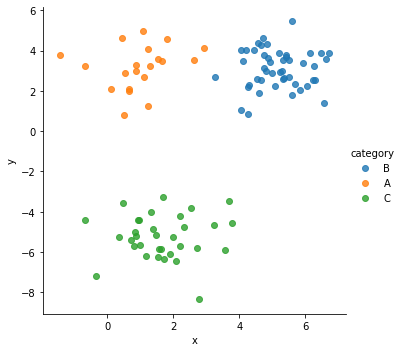

In [8]:
vis = sns.lmplot(data = df, x= 'x',y = 'y' , fit_reg=False , hue = 'category')